# <u> Importing SQL table using Python Pandas.

### - Importing customers table(main table).

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# Fill in the PostgreSQL details.

user = 'postgres'
password = 'ducati1200'
host = 'localhost'   # or the server IP
port = '5432'        # default PostgreSQL port
database = 'banking_project'

In [3]:
# Create SQLAlchemy engine.

engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")

In [4]:
# Read full table into pandas DataFrame.

df = pd.read_sql_table('customers', con = engine)

In [5]:
# Check the first five rows of the df.

df.head()

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,gender_id,ia_id
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


### - Check the shape of the DataFrame.

In [6]:
df.shape

(3000, 25)

### - DataFrame info.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   client_id                 3000 non-null   object        
 1   name                      3000 non-null   object        
 2   age                       3000 non-null   int64         
 3   location_id               3000 non-null   int64         
 4   joined_bank               3000 non-null   datetime64[ns]
 5   banking_contact           3000 non-null   object        
 6   nationality               3000 non-null   object        
 7   occupation                3000 non-null   object        
 8   fee_structure             3000 non-null   object        
 9   loyalty_classification    3000 non-null   object        
 10  estimated_income          3000 non-null   float64       
 11  superannuation_savings    3000 non-null   float64       
 12  amount_of_credit_car

### - Importing banking_relationships, gender_relationships and investment_advisors tables.

In [8]:
df1 = pd.read_sql_table('banking_relationships', con = engine)

In [9]:
df2 = pd.read_sql_table('gender_relationships', con = engine)

In [10]:
df3 = pd.read_sql_table('investment_advisors', con = engine)

- NOTE:

    We already have the engine created.

In [11]:
df1.head()

,brid,banking_relationship
0,1,Retail
1,2,Institutional
2,3,Private Bank
3,4,Commercial


In [12]:
df2.head()

,gender_id,gender
0,1,Male
1,2,Female


In [13]:
df3.head()

,ia_id,investment_advisor
0,1,Victor Dean
1,2,Jeremy Porter
2,3,Ernest Knight
3,4,Eric Shaw
4,5,Kevin Kim


### - Joining banking_relationships, gender_relationships and investment_advisors tables to the customers table(main table).

In [14]:
customers_df = pd.merge(df, df1, how = 'inner', on = 'brid')

In [15]:
customers_df = pd.merge(customers_df, df2, how = 'inner', on = 'gender_id')

In [16]:
customers_df = pd.merge(customers_df, df3, how = 'inner', on = 'ia_id')

In [17]:
customers_df.head()

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,gender_id,ia_id,banking_relationship,gender,investment_advisor
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,12249.96,1134475.30,1,2,1,1,1,Retail,Male,Victor Dean
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,61162.31,2000526.10,1,3,2,1,2,Institutional,Male,Jeremy Porter
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,79071.78,548137.58,1,3,3,2,3,Private Bank,Female,Ernest Knight
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,57513.65,1148402.29,0,4,4,1,4,Commercial,Male,Eric Shaw
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,30012.14,1674412.12,0,3,1,2,5,Retail,Female,Kevin Kim


In [18]:
# Check the shape of customers_df

customers_df.shape

(3000, 28)

In [19]:
# customers_df info.

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   client_id                 3000 non-null   object        
 1   name                      3000 non-null   object        
 2   age                       3000 non-null   int64         
 3   location_id               3000 non-null   int64         
 4   joined_bank               3000 non-null   datetime64[ns]
 5   banking_contact           3000 non-null   object        
 6   nationality               3000 non-null   object        
 7   occupation                3000 non-null   object        
 8   fee_structure             3000 non-null   object        
 9   loyalty_classification    3000 non-null   object        
 10  estimated_income          3000 non-null   float64       
 11  superannuation_savings    3000 non-null   float64       
 12  amount_of_credit_car

#### Now we have our dataset / DataFrame imported and we can perform EDA(Exploratory Data Analysis) on it. 

---

# <u> Check for missing values.

In [20]:
missing_values = customers_df.isnull().sum()
missing_values
print(f"Missing values per column:\n{missing_values}")

Missing values per column:
client_id                   0
name                        0
age                         0
location_id                 0
joined_bank                 0
banking_contact             0
nationality                 0
occupation                  0
fee_structure               0
loyalty_classification      0
estimated_income            0
superannuation_savings      0
amount_of_credit_cards      0
credit_card_balance         0
bank_loans                  0
bank_deposits               0
checking_accounts           0
saving_accounts             0
foreign_currency_account    0
business_lending            0
properties_owned            0
risk_weighting              0
brid                        0
gender_id                   0
ia_id                       0
banking_relationship        0
gender                      0
investment_advisor          0
dtype: int64


***No missing values.***

---

In [21]:
# joined_bank data type is in the right format, no changes needed.

#customers_df['joined_bank'] = pd.to_datetime(customers_df['joined_bank'], format = '%d-%m-%Y')
print(customers_df['joined_bank'].dtype)

datetime64[ns]


---

# <u>Generate descriptive statistics for the DataFrame.

In [22]:
customers_df.describe()

,age,location_id,joined_bank,estimated_income,superannuation_savings,amount_of_credit_cards,credit_card_balance,bank_loans,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,gender_id,ia_id
count,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,2010-08-15 00:03:21.600000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
min,17.000000,12.000000,1995-01-03 00:00:00,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,2004-04-01 18:00:00,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,2011-02-18 00:00:00,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,2017-12-24 06:00:00,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,2021-12-31 00:00:00,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000
std,19.854760,12462.273017,NaN,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242


In [23]:
customers_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
age,3000.0,51.039667,17.0,34.0,51.0,69.0,85.0,19.85476
location_id,3000.0,21563.323,12.0,10803.5,21129.5,32054.5,43369.0,12462.273017
joined_bank,3000,2010-08-15 00:03:21.600000,1995-01-03 00:00:00,2004-04-01 18:00:00,2011-02-18 00:00:00,2017-12-24 06:00:00,2021-12-31 00:00:00,NaN
estimated_income,3000.0,171305.034263,15919.48,82906.595,142313.48,242290.305,522330.26,111935.808209
superannuation_savings,3000.0,25531.599673,1482.03,12513.775,22357.355,35464.74,75963.9,16259.95077
amount_of_credit_cards,3000.0,1.463667,1.0,1.0,1.0,2.0,3.0,0.676387
credit_card_balance,3000.0,3176.206943,1.17,1236.63,2560.805,4522.6325,13991.99,2497.094709
bank_loans,3000.0,591386.155487,0.0,239628.1375,479793.4,825813.0375,2667556.66,457557.036334
bank_deposits,3000.0,671560.193923,0.0,204400.375,463316.46,942754.63,3890598.08,645716.856875
checking_accounts,3000.0,321092.949127,0.0,119947.53,242815.655,434874.9375,1969923.08,282079.553893


---

# <u>How is the customer base distributed across low, mid, and high estimated income bands?

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
customers_df['estimated_income']

0        75384.77
1       289834.31
2       169935.23
3       356808.11
4       130711.68
          ...    
2995    297617.14
2996     42397.46
2997     48339.88
2998    107265.87
2999     56826.53
Name: estimated_income, Length: 3000, dtype: float64

In [26]:
# Define income band boundaries

bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Mid', 'High']

- <u>NOTE:

    float('inf') makes sure that any income above 300000 still falls into the last band ('High').

### pd.cut()

    pd.cut() divides (or "bins") continuous numeric data into categories (ranges).

    Syntax: pd.cut(x, bins, labels, include_lowest = bool)

    where;
        x : array-like, The input array to be binned. Must be 1-dimensional.
        bins: int, sequence of scalars, or IntervalIndex.
        labels: Specifies the labels for the returned bins. Must be the same length as the resulting bins. If False, returns only integer indicators of the bins.
        include_lowest: bool, default False, Whether the first interval should be left-inclusive or not.

In [27]:
# Create the 'Income Band' column using pd.cut()

customers_df['income_band'] = pd.cut(customers_df['estimated_income'], bins = bins, labels = labels, include_lowest = True)

In [28]:
customers_df.head()

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,business_lending,properties_owned,risk_weighting,brid,gender_id,ia_id,banking_relationship,gender,investment_advisor,income_band
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1134475.30,1,2,1,1,1,Retail,Male,Victor Dean,Low
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,2000526.10,1,3,2,1,2,Institutional,Male,Jeremy Porter,Mid
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,548137.58,1,3,3,2,3,Private Bank,Female,Ernest Knight,Mid
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1148402.29,0,4,4,1,4,Commercial,Male,Eric Shaw,High
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,1674412.12,0,3,1,2,5,Retail,Female,Kevin Kim,Mid


<Axes: xlabel='income_band', ylabel='count'>

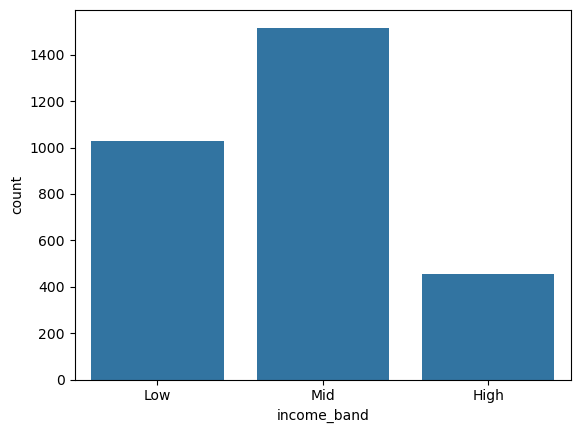

In [29]:
sns.countplot(x = 'income_band', data = customers_df)

### Key Insight:

Mid-income customers form the largest segment, while high-income customers are the smallest, indicating a distribution skewed toward the mid band.

---

# <u>Univariate Analysis.

### - Examine the distribution of unique categories in categorical columns.

In [30]:
categorical_cols = ['banking_relationship', 'gender', 'investment_advisor']

for col in categorical_cols:
    print(f'\nValue counts for {col}:')
    print(customers_df[col].value_counts())


Value counts for banking_relationship:
banking_relationship
Private Bank     1352
Retail            660
Institutional     495
Commercial        493
Name: count, dtype: int64

Value counts for gender:
gender
Female    1512
Male      1488
Name: count, dtype: int64

Value counts for investment_advisor:
investment_advisor
Victor Dean          177
Jeremy Porter        177
Ernest Knight        177
Eric Shaw            177
Joe Carroll          177
Steve Sanchez        176
Daniel Carroll       176
Victor Gutierrez     176
Lawrence Sanchez     176
Peter Castillo       176
Carl Anderson        176
Nicholas Ward        176
Victor Rogers         89
Kevin Kim             89
Eugene Cunningham     89
Fred Bryant           88
Ryan Taylor           88
Sean Vasquez          88
Nicholas Morrison     88
Jack Phillips         88
Juan Ramirez          88
Gregory Boyd          88
Name: count, dtype: int64


### - For more categorial columns and using Seaborn and Matplotlib.

In [31]:
categorical_cols = ['nationality', 'occupation', 'fee_structure', 'loyalty_classification', 'amount_of_credit_cards', 'properties_owned','risk_weighting', 'banking_relationship', 'gender', 'ia_id', 'income_band']

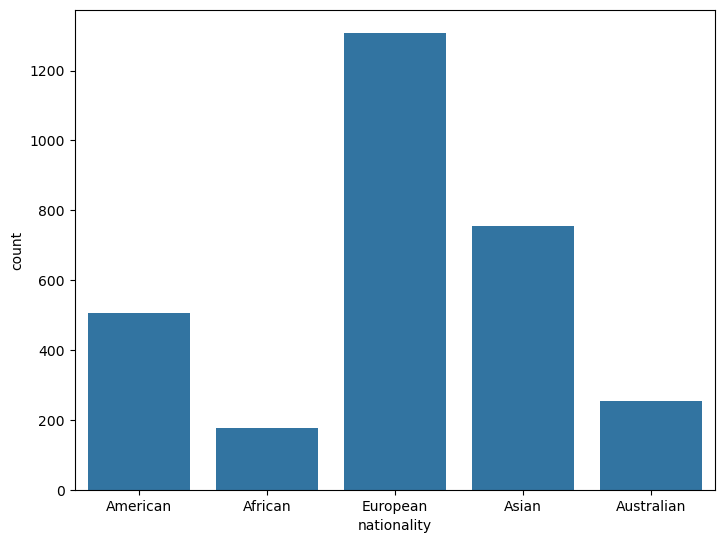

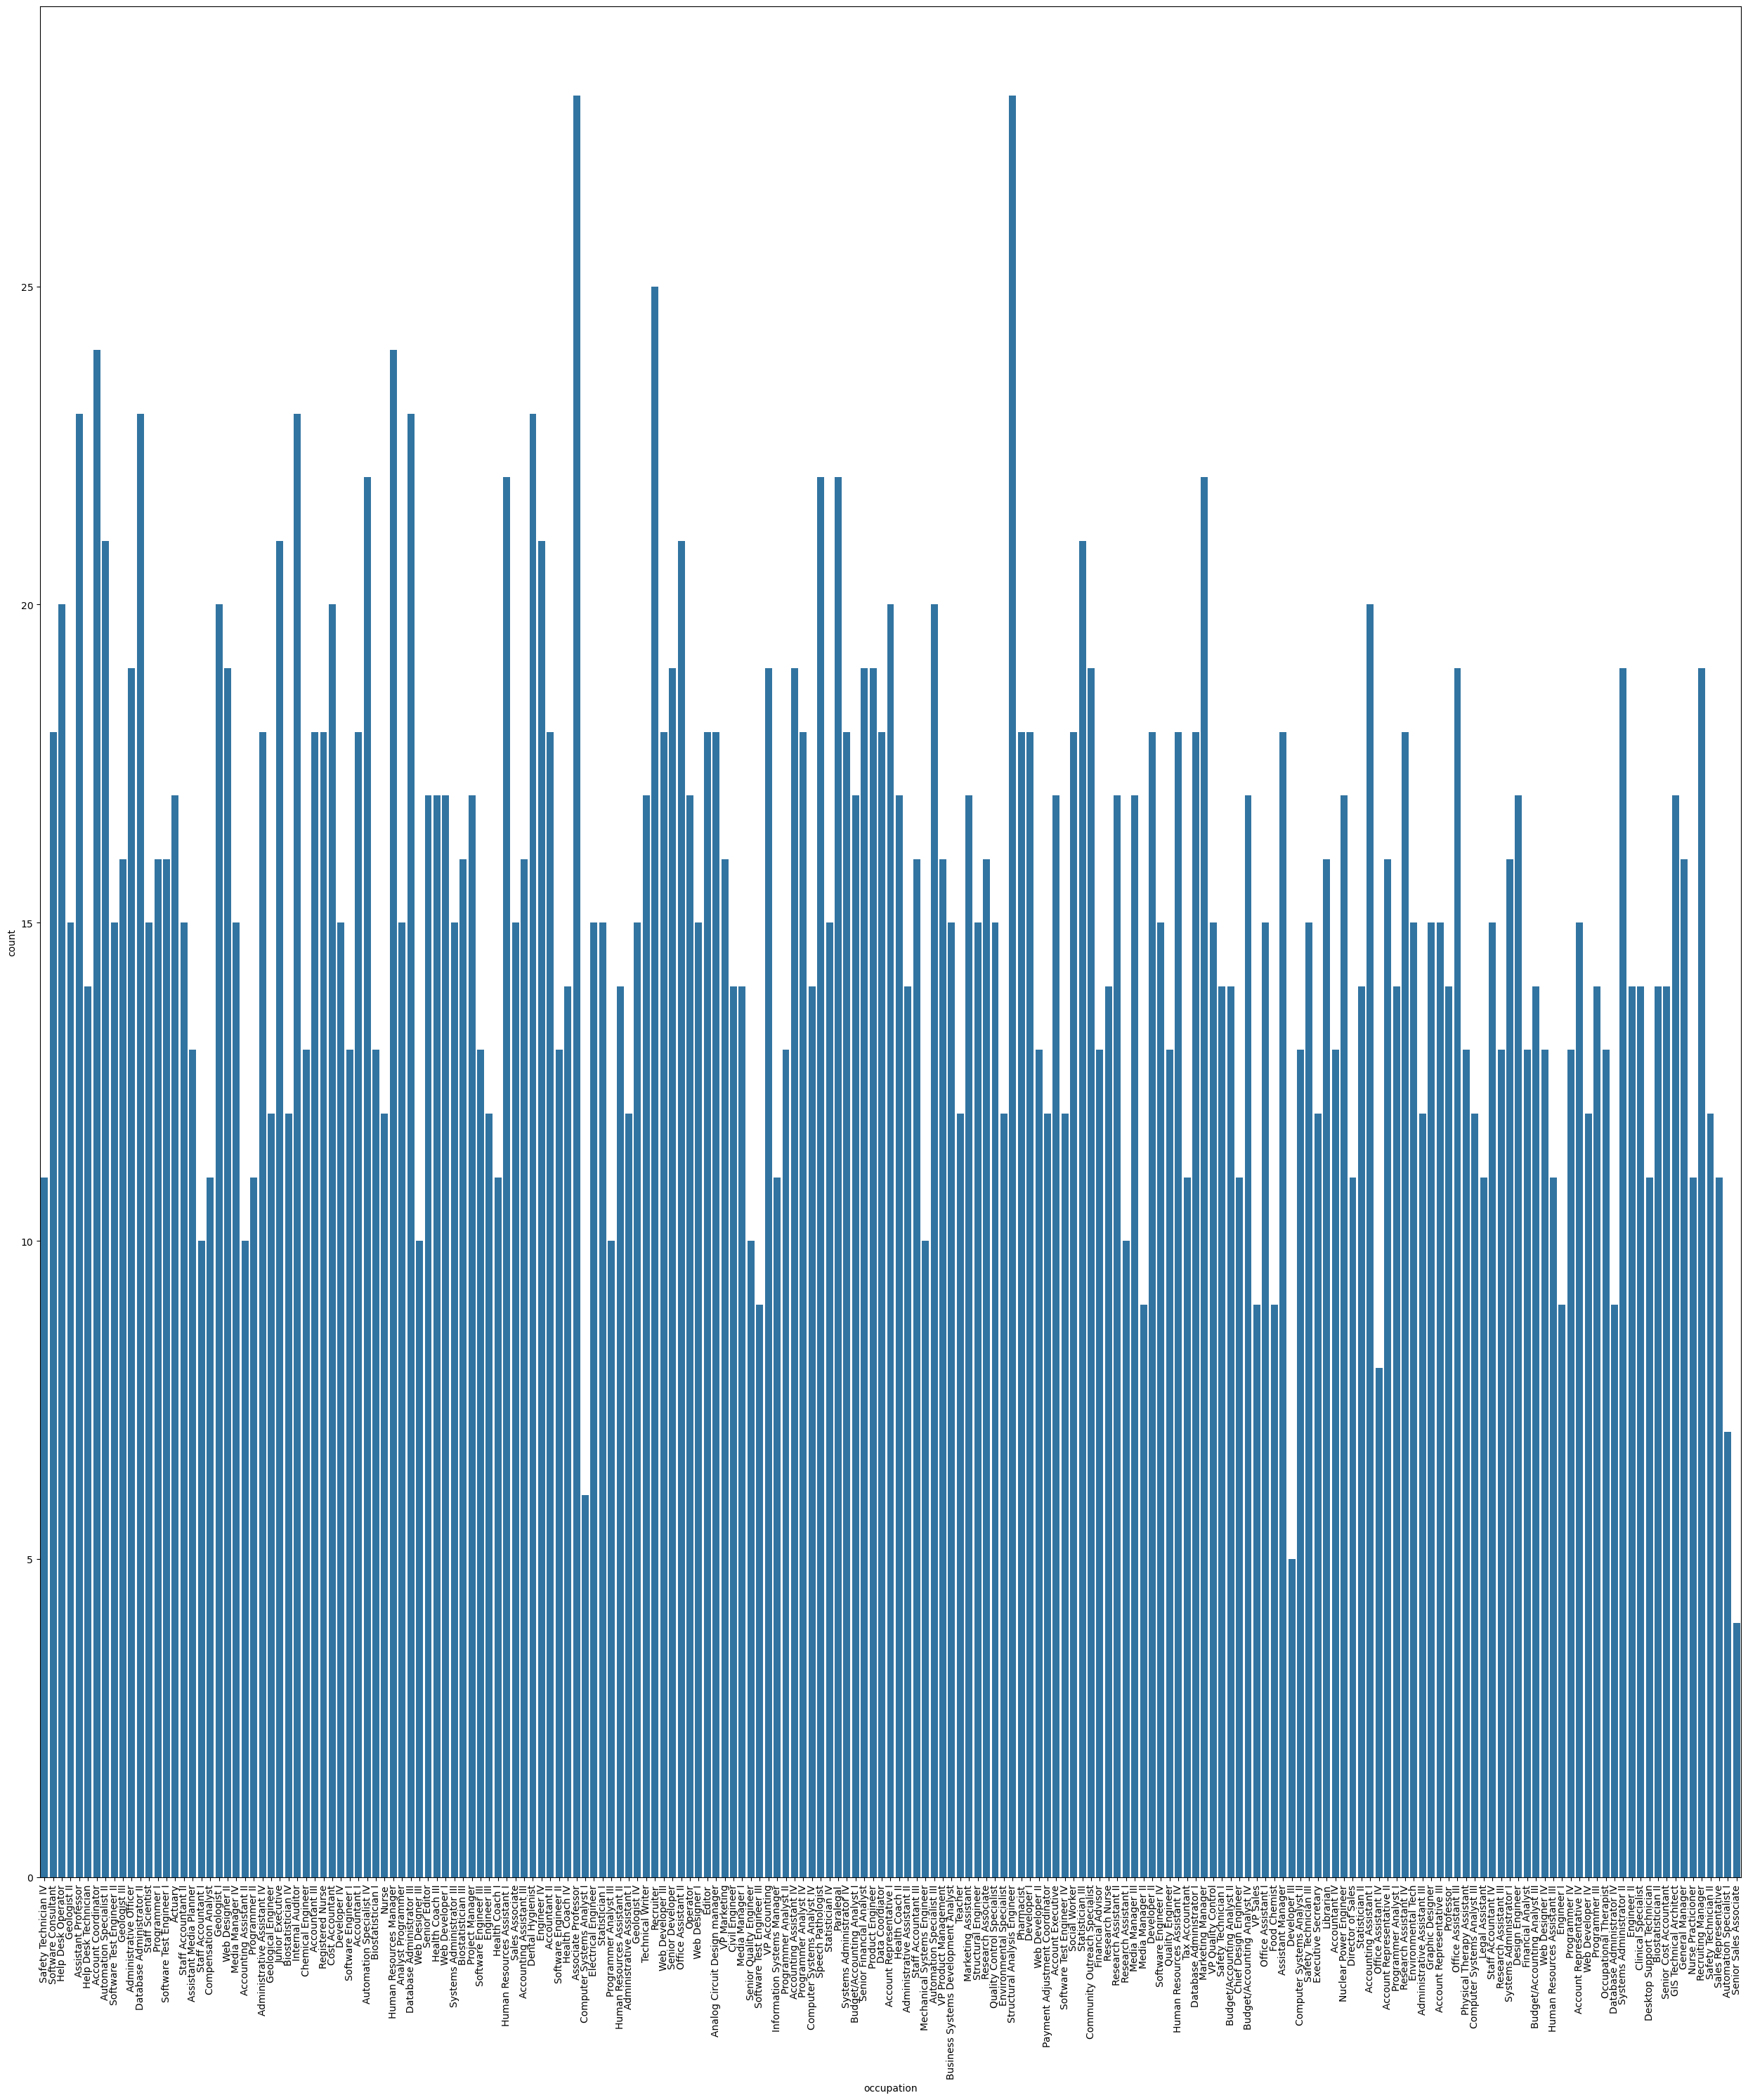

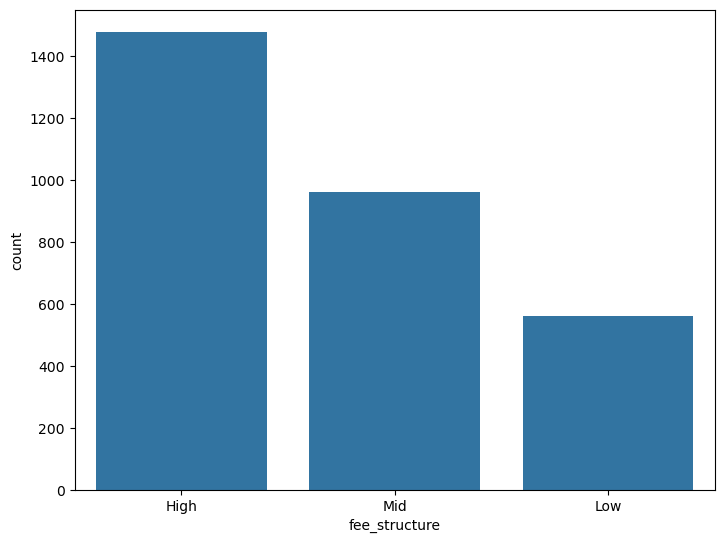

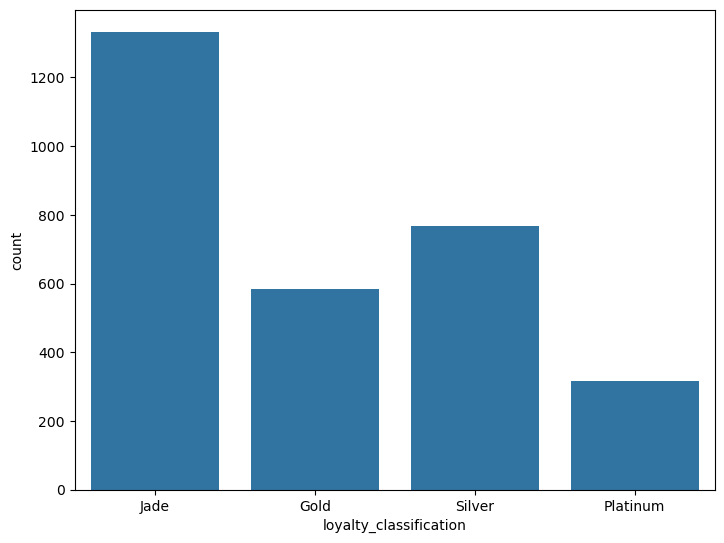

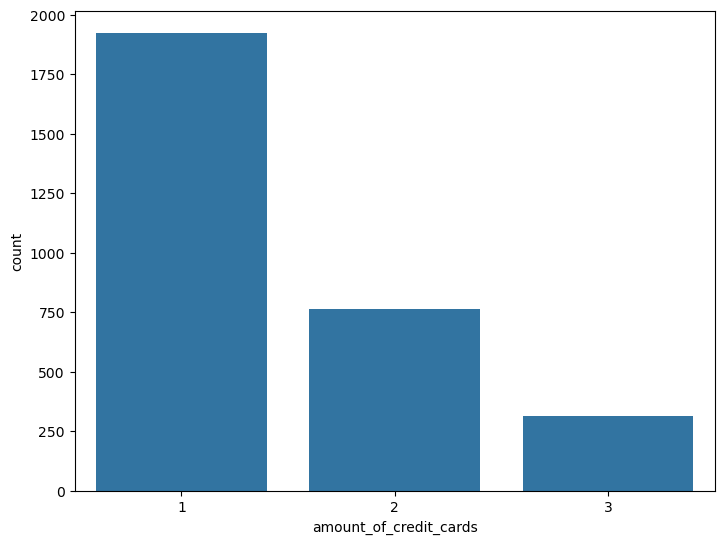

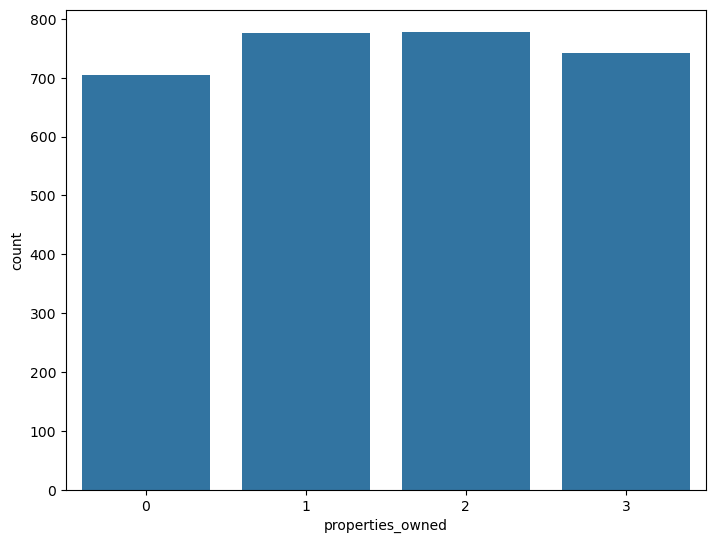

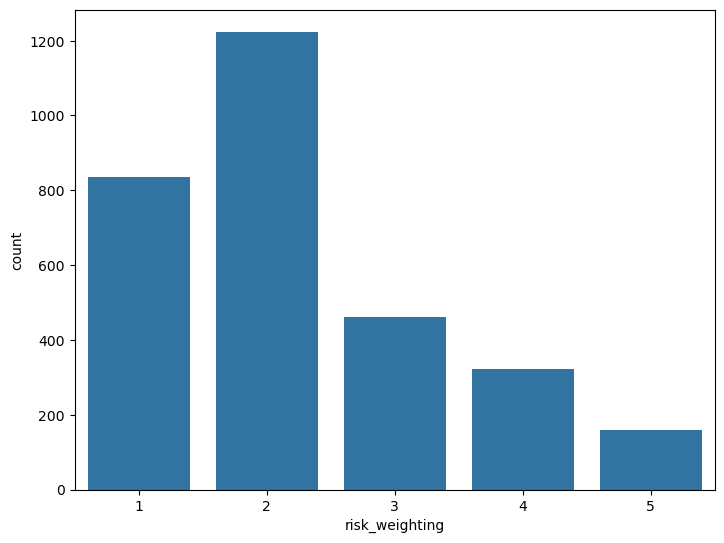

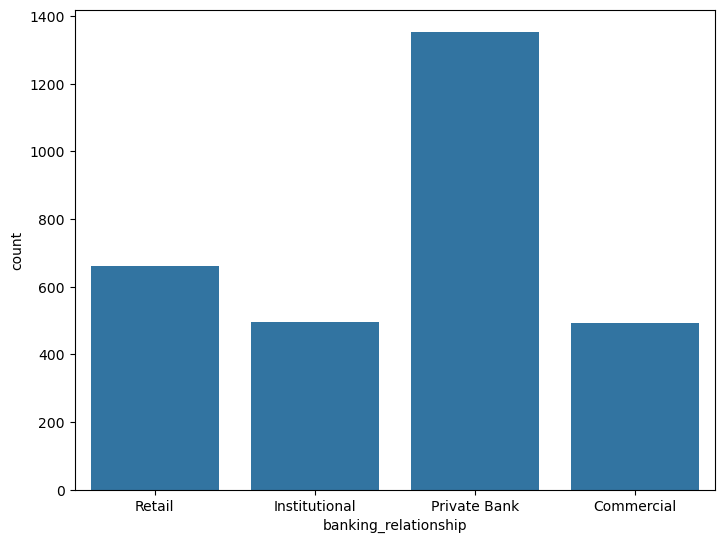

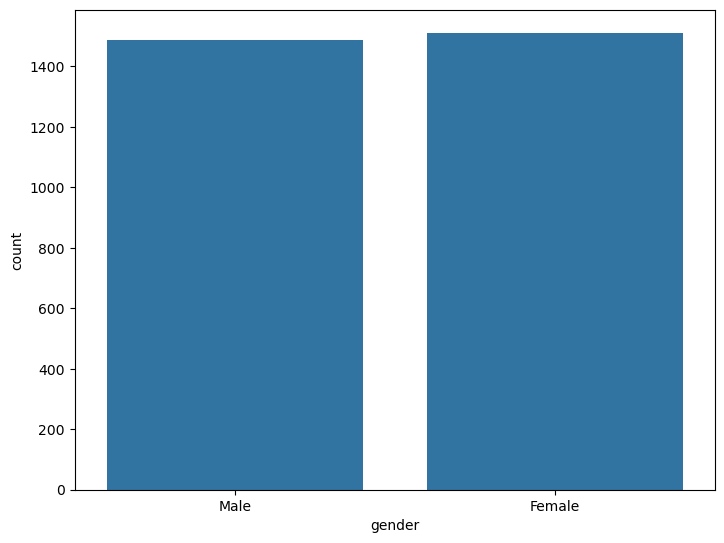

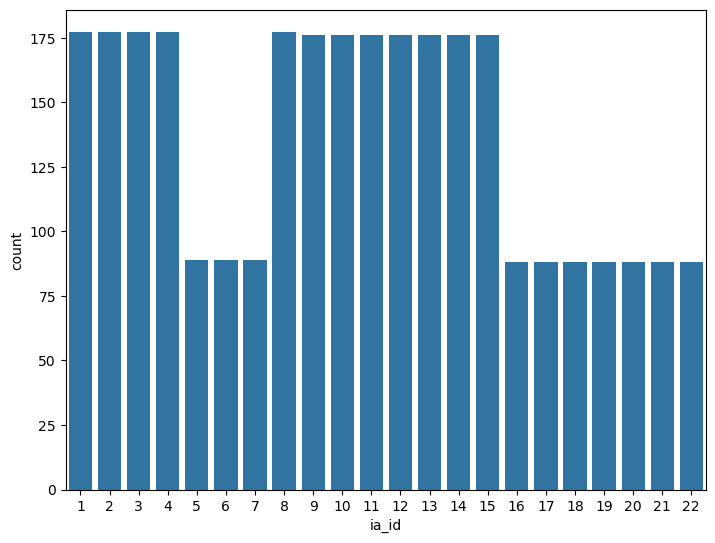

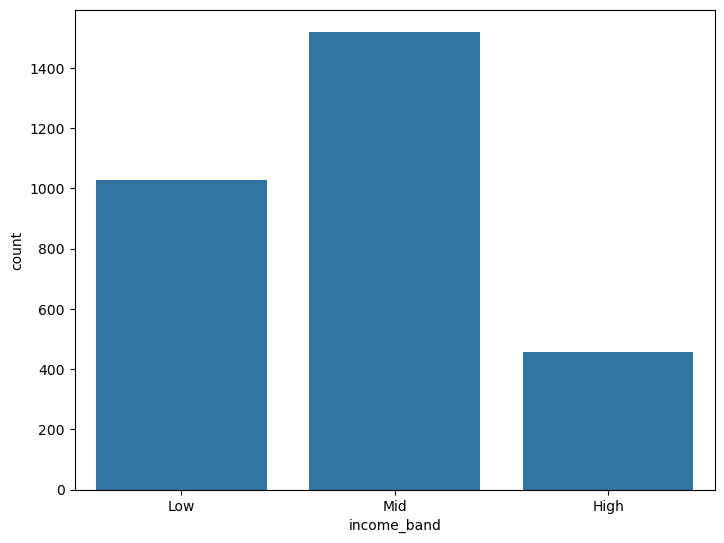

In [32]:
for col in categorical_cols:

    if col == 'occupation':
        fig = plt.figure(figsize = (25, 30)) 
        sns.countplot(x = col , data = customers_df)
        plt.xticks(rotation = 90)  # rotate labels 90°
        plt.tight_layout()
    
    else:
        fig = plt.figure()
        axes = fig.add_axes([0, 0, 1, 1]) 
        sns.countplot(x = col , data = customers_df)
        plt.show()

### - For Numerical columns. 

In [33]:
numerical_cols = ['age', 'estimated_income', 'superannuation_savings', 'credit_card_balance', 'bank_loans', 'bank_deposits', 'checking_accounts', 'saving_accounts', 'foreign_currency_account', 'business_lending']

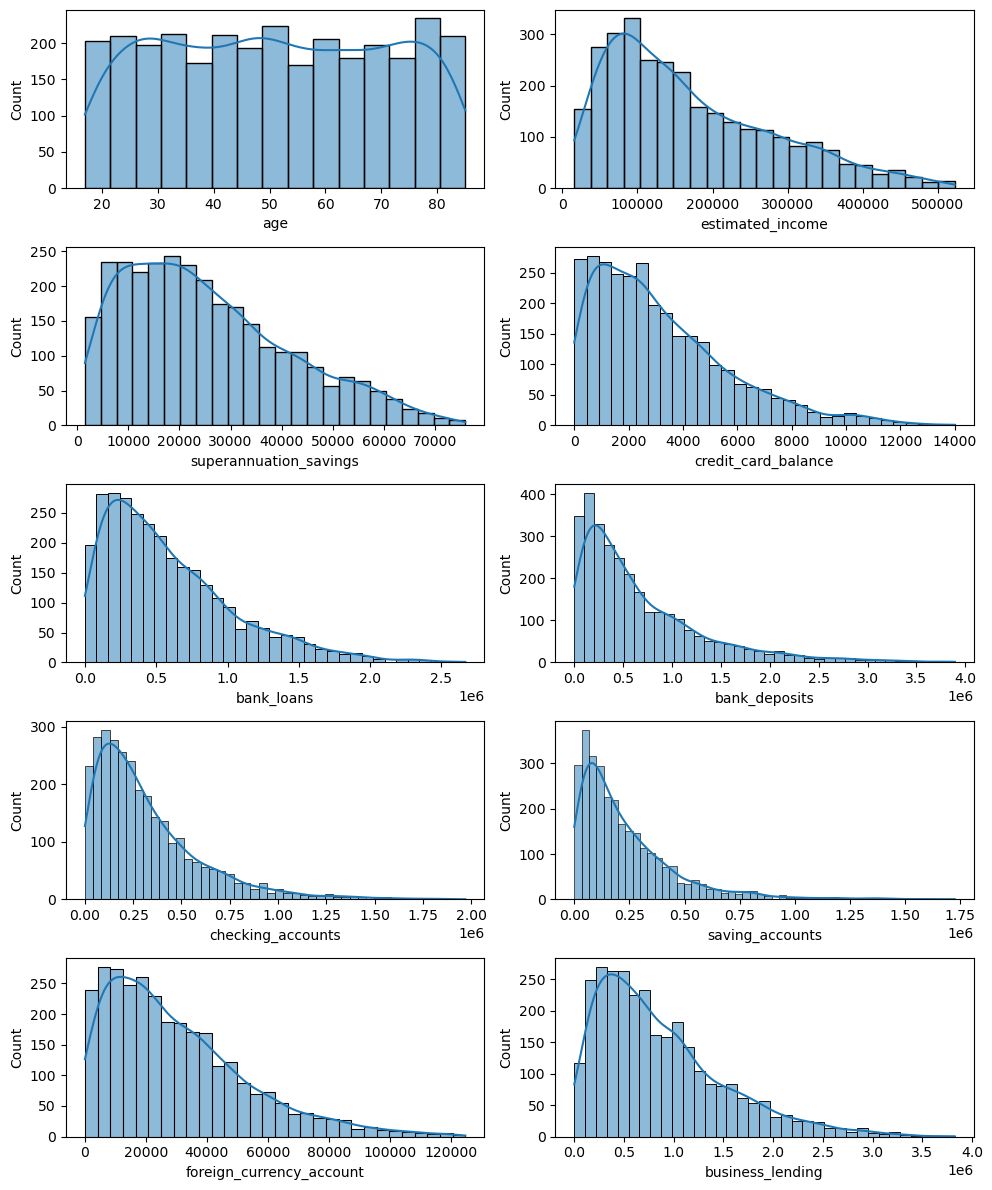

In [34]:
(fig, axes) = plt.subplots(nrows = 5, ncols = 2, figsize = (10, 12))

axes = axes.flatten()

for (i, col) in enumerate(numerical_cols):
    sns.histplot(customers_df[col], kde = True, ax = axes[i])

plt.tight_layout()

- <u>NOTE:

    - The variable axes here is actually a 2D NumPy array that looks conceptually like this:
                axes =[[ax00, ax01], [ax10, ax11], [ax20, ax21], [ax30, ax31], [ax40, ax41]]
    - axes[i] only works if axes is 1D, but here it’s 2D.
    - That’s why we flatten it. (axes = axes.flatten())
    - axes = [ax00, ax01, ax10, ax11, ax20, ax21, ax30, ax31, ax40, ax41]

---

# <u>Bivariate Analysis / Multivariate Analysis.

### 1) Do higher incomes have proportionally higher credit card balances?(credit risk → ability to repay)

***Why: detects high absolute balances vs ability to pay.***

<Axes: xlabel='income_band', ylabel='credit_card_balance'>

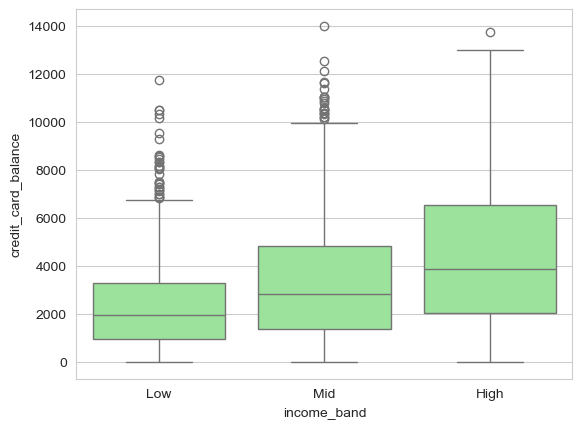

In [35]:
sns.set_style('whitegrid')
sns.boxplot(x = 'income_band', y = 'credit_card_balance', data = customers_df, color = 'lightgreen')

- ***Key Insights:***

    - Median balance increases with income band (Low → Mid → High) — higher-income groups carry larger typical credit-card balances.
    - Variability grows with income: IQR and whiskers are much wider for Mid and especially High, so wealthier customers show a much larger spread of balances.
    - Not strictly proportional: balances rise with income but not perfectly linearly — there’s overlap between bands and plenty of high balances in Mid/Low as outliers.
    - Risk Takeaway: high balances in Low income (the visible outliers) are especially concerning — they indicate customers with limited ability to repay carrying large debt. For High income, high balances may reflect higher limits rather than risk.

### 2) Is credit utilization concentrated in particular age groups? (age vs credit_card_balance)

***Why: younger vs older credit behavior → targeted risk rules.***

***boxplot grouped by age buckets (or violinplot).***

In [36]:
customers_df['age_band'] = pd.cut(customers_df['age'], bins = [18,30,45,60,float('inf')], labels=['18-29','30-44','45-59','60+'])

In [37]:
customers_df.head(10)

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,properties_owned,risk_weighting,brid,gender_id,ia_id,banking_relationship,gender,investment_advisor,income_band,age_band
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1,2,1,1,1,Retail,Male,Victor Dean,Low,18-29
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,1,3,2,1,2,Institutional,Male,Jeremy Porter,Mid,18-29
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1,3,3,2,3,Private Bank,Female,Ernest Knight,Mid,18-29
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,0,4,4,1,4,Commercial,Male,Eric Shaw,High,30-44
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,0,3,1,2,5,Retail,Female,Kevin Kim,Mid,45-59
5,IND78532,Samuel Hudson,23,13204,2019-02-07,Douglas Tucker,American,Help Desk Technician,High,Silver,...,1,2,1,1,6,Retail,Male,Victor Rogers,Mid,18-29
6,IND95683,Timothy Alexander,46,42910,2002-06-02,Douglas Tucker,Asian,Account Coordinator,High,Gold,...,1,1,1,2,7,Retail,Female,Eugene Cunningham,Low,45-59
7,IND40785,Carl Martin,78,6127,2000-11-03,Steve Diaz,European,Automation Specialist II,Mid,Gold,...,0,2,2,2,8,Institutional,Female,Joe Carroll,Low,60+
8,IND13570,Philip Day,67,32656,2015-04-07,Bruce Butler,Asian,Software Test Engineer II,High,Silver,...,0,1,2,2,9,Institutional,Female,Steve Sanchez,Low,60+
9,IND53299,Jason Sims,51,28340,1995-11-20,Joe Price,European,Geologist III,Mid,Silver,...,2,1,3,1,10,Private Bank,Male,Lawrence Sanchez,Low,45-59


<Axes: xlabel='age_band', ylabel='credit_card_balance'>

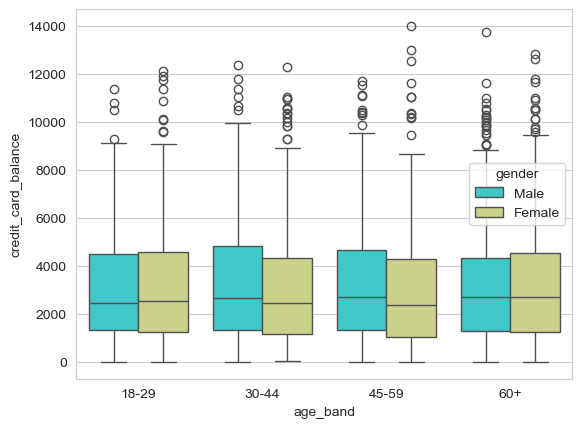

In [38]:
sns.set_style('whitegrid')
sns.boxplot( x = 'age_band', y = 'credit_card_balance', data = customers_df, hue = 'gender', palette = 'rainbow')

- ***Key Insights:***

    - Credit utilization is relatively consistent across age groups with no strong age concentration. Gender shows minimal differences.
    - Risk Takeaway: Age is not a strong credit risk predictor by itself.

### 3) Which occupations show higher loan amounts or credit balances? (occupation vs bank_loans / credit_card_balance)

***Why: occupation is a proxy for income stability → risk profiling.***

In [39]:
customers_df['occupation'].value_counts(ascending = False).head(10).index

Index(['Associate Professor', 'Structural Analysis Engineer', 'Recruiter',
       'Account Coordinator', 'Human Resources Manager',
       'Database Administrator III', 'Dental Hygienist', 'Internal Auditor',
       'Assistant Professor', 'Database Administrator II'],
      dtype='object', name='occupation')

In [40]:
top_occupation = customers_df['occupation'].value_counts(ascending = False).head(10).index

***For bank_loans :***

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Assistant Professor'),
  Text(1, 0, 'Account Coordinator'),
  Text(2, 0, 'Database Administrator II'),
  Text(3, 0, 'Internal Auditor'),
  Text(4, 0, 'Human Resources Manager'),
  Text(5, 0, 'Database Administrator III'),
  Text(6, 0, 'Dental Hygienist'),
  Text(7, 0, 'Associate Professor'),
  Text(8, 0, 'Recruiter'),
  Text(9, 0, 'Structural Analysis Engineer')])

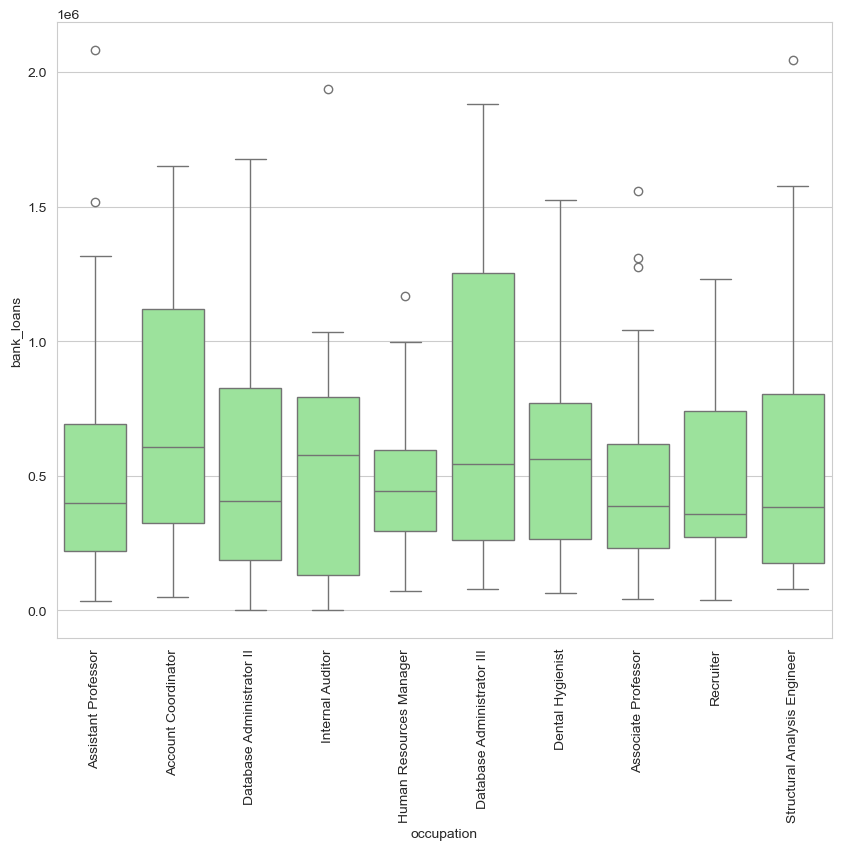

In [41]:
fig = plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.boxplot( x = 'occupation', y = 'bank_loans', data = customers_df[customers_df['occupation'].isin(top_occupation)], color = 'lightgreen')
plt.xticks(rotation = 90)

- <u>NOTE:

    - The .isin() function checks whether each element in a Series (or column) is present in a given list, set, or another Series — and returns a Series of True/False values.
    - Syntax: Series.isin(values)
    - values → list, set, tuple, Series, or Index of values to check against.

- ***Key Insights:***

    - Database Administrators III, followed by Account Coordinators, show the highest 75th percentile loan amounts, indicating typically higher loan values in these occupations.
    - These roles may represent higher exposure segments — potential for both profitable lending and elevated default risk if debt servicing capacity isn’t verified.

***For credit_card_balance :***

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Assistant Professor'),
  Text(1, 0, 'Account Coordinator'),
  Text(2, 0, 'Database Administrator II'),
  Text(3, 0, 'Internal Auditor'),
  Text(4, 0, 'Human Resources Manager'),
  Text(5, 0, 'Database Administrator III'),
  Text(6, 0, 'Dental Hygienist'),
  Text(7, 0, 'Associate Professor'),
  Text(8, 0, 'Recruiter'),
  Text(9, 0, 'Structural Analysis Engineer')])

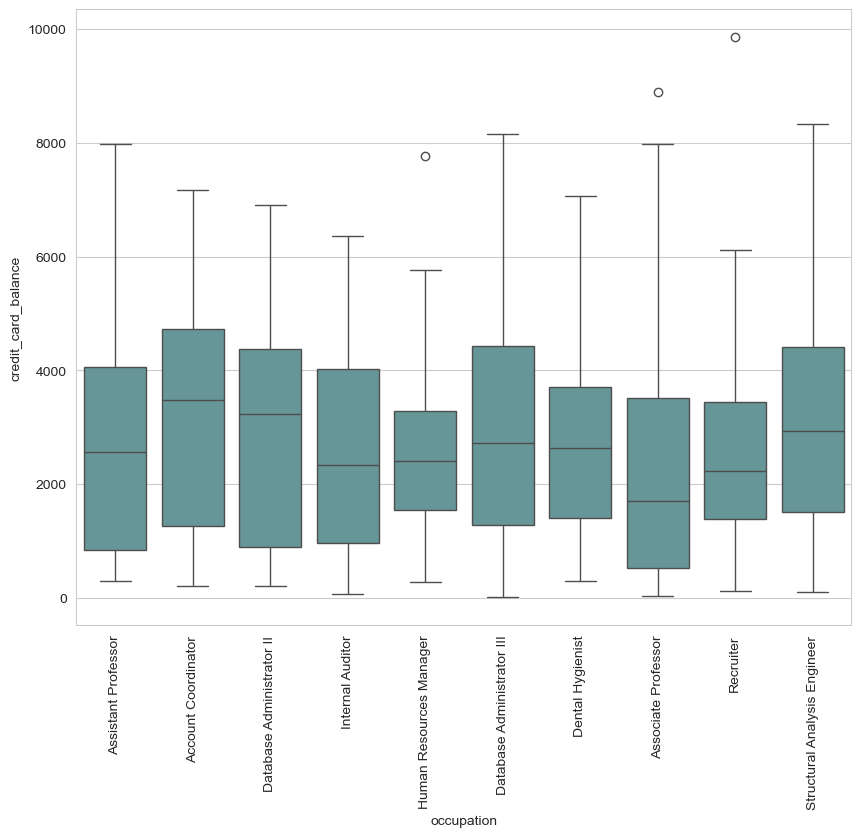

In [42]:
fig = plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.boxplot( x = 'occupation', y = 'credit_card_balance', data = customers_df[customers_df['occupation'].isin(top_occupation)], color = 'cadetblue')
plt.xticks(rotation = 90)

- ***Key Insights:***

    - Account Coordinators followed by Database Administrators and Structural Analysis Engineer, display the highest 75th percentile credit card balances, suggesting these occupations typically carry greater revolving debt.
    - These high-balance segments warrant closer monitoring for combined loan and card exposure risks.

### 4) How does income level influence loan approval amounts across different age bands?

Text(0.5, 1.0, 'Estimated Income vs Bank Loans Across Age Bands')

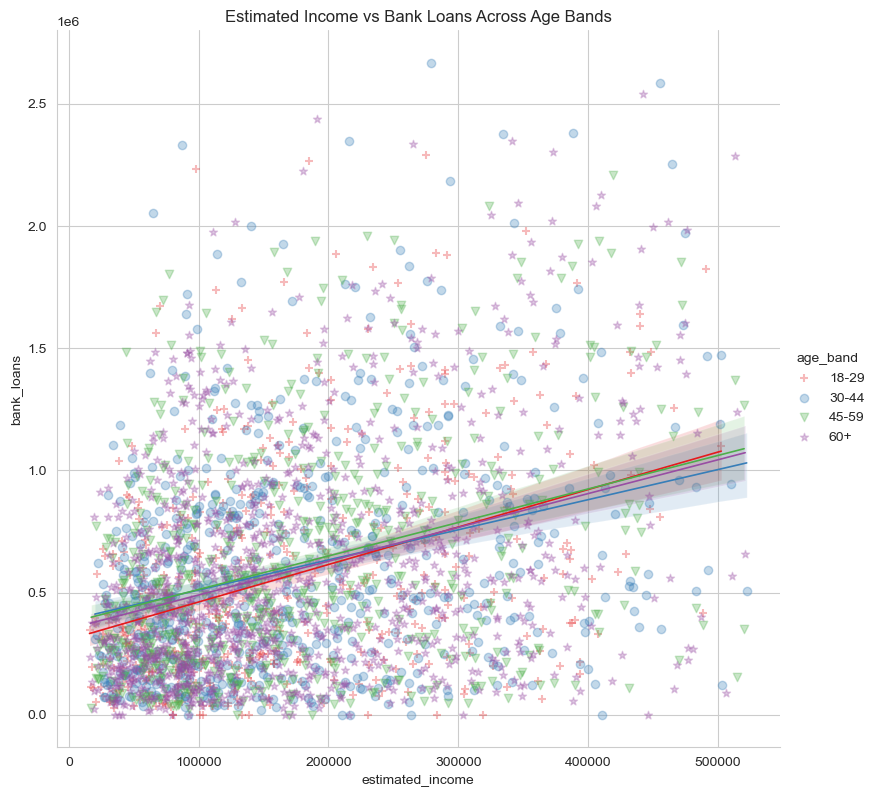

In [43]:
sns.set_style('whitegrid')
sns.lmplot(
    x = 'estimated_income',
    y = 'bank_loans',
    data = customers_df,
    hue = 'age_band',
    palette = 'Set1',
    markers = ['+', 'o', 'v', '*'],
    aspect = 1,
    height = 8,
    scatter_kws = {'alpha': 0.3},
    line_kws = {'lw': 1.2}
)
plt.title('Estimated Income vs Bank Loans Across Age Bands')

- ***Key Insights:***

    - Income increases align with larger loans for every age band, and inter-band slope gaps are modest.
    - Slope ranking: 18–29 > 45–59 > 60+ > 30–44.
    - Risk takeaway:
        - The steeper 18–29 slope implies more aggressive loan sizing relative to income for younger clients, increasing sensitivity to income shocks.
        - Apply tighter limits or extra checks for high-income 18–29 borrowers.

### 5) How do the distributions of bank loans and bank deposits vary across income bands, and how does properties_owned modify those distributions within each band?

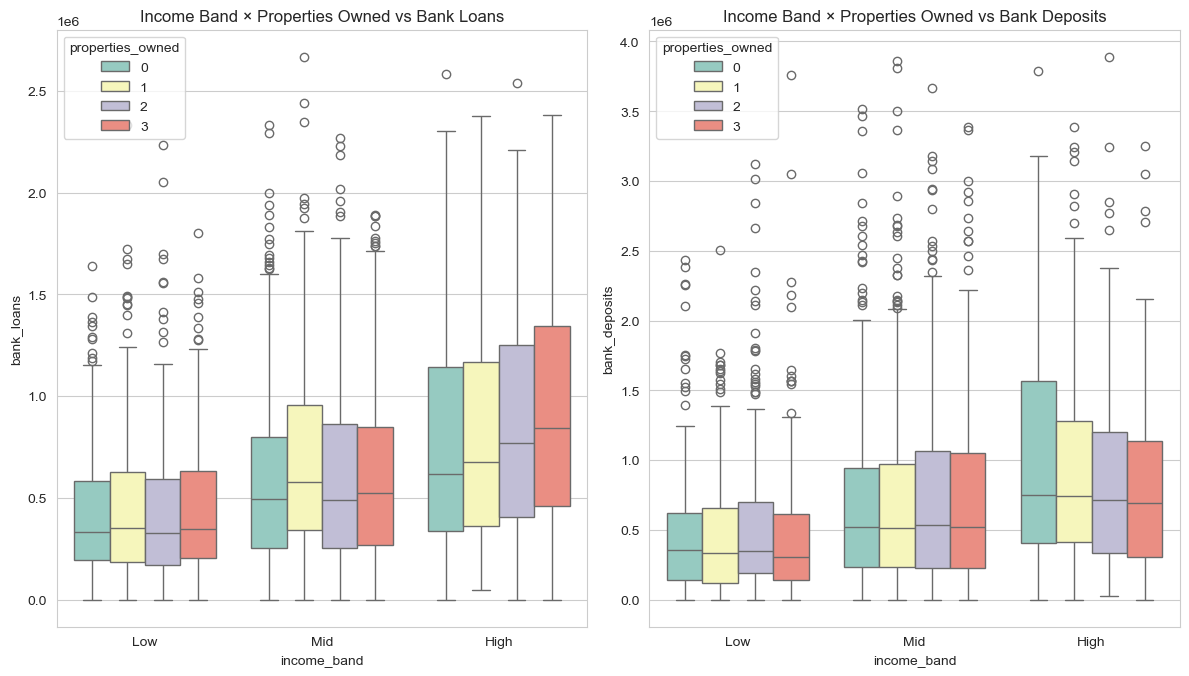

In [44]:
(fig, axes) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 7))

sns.set_style('whitegrid')

sns.boxplot(
    x = 'income_band', 
    y = 'bank_loans', 
    data = customers_df,
    hue = 'properties_owned',
    palette = 'Set3',
    ax = axes[0]
    )
axes[0].set_title('Income Band × Properties Owned vs Bank Loans')

sns.boxplot(
    x = 'income_band', 
    y = 'bank_deposits', 
    data = customers_df,
    hue = 'properties_owned',
    palette = 'Set3',
    ax = axes[1]
    )
axes[1].set_title('Income Band × Properties Owned vs Bank Deposits') 

plt.tight_layout()

- ***Key Insights:***

    - Across income bands, bank loans and deposits generally rise with income.
    - Loans: In the high-income band, owning properties is associated with slightly higher loan levels; in mid and low bands, within‑band differences by properties_owned are marginal.
    - Deposits: In the high-income band, zero‑property clients show the highest deposits, while medians for 1→3 properties edge down; mid and low bands show only mild shifts by properties_owned.
    - Dispersion: Outliers are more frequent in low and mid bands for both loans and deposits.
    - Risk Takeaway:
        - Treat high-income mortgage holders as a concentration risk.
        - Review deposit concentration among high-income, no-property clients.
        - Increase tail monitoring and stress tests for low/mid-income cohorts.

### 6)  How do debt‑to‑income ratios vary across age bands, and how do these distributions differ by risk_weighting segments?

In [45]:
import numpy as np

In [46]:
# Create a new column for Debt-to-Income Ratio

customers_df['debt_to_income_ratio'] = np.where(
    customers_df['estimated_income'] > 0,
    (customers_df['credit_card_balance'] + customers_df['bank_loans']) / customers_df['estimated_income'],
    0
)

In [47]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   client_id                 3000 non-null   object        
 1   name                      3000 non-null   object        
 2   age                       3000 non-null   int64         
 3   location_id               3000 non-null   int64         
 4   joined_bank               3000 non-null   datetime64[ns]
 5   banking_contact           3000 non-null   object        
 6   nationality               3000 non-null   object        
 7   occupation                3000 non-null   object        
 8   fee_structure             3000 non-null   object        
 9   loyalty_classification    3000 non-null   object        
 10  estimated_income          3000 non-null   float64       
 11  superannuation_savings    3000 non-null   float64       
 12  amount_of_credit_car

- <u>NOTE:

    - np.where(condition, x, y)
    - condition : array_like, bool
          Where True, yield `x`, otherwise yield `y`.
    - In our code it prevents divide‑by‑zero and sets a safe fallback value.

Text(0.5, 1.0, 'Debt-to-Income Ratio Across Age Brackets by Income Bands')

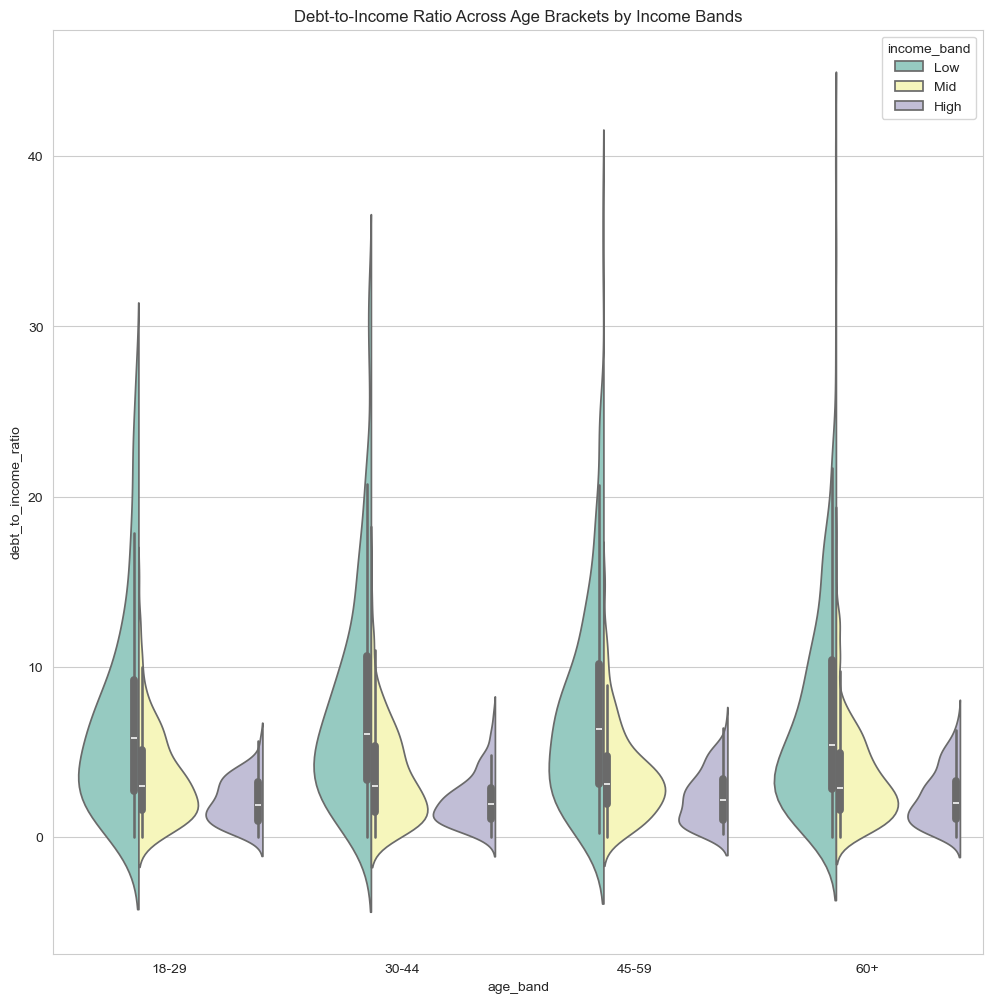

In [48]:
fig = plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
sns.violinplot(
    x = 'age_band',
    y = 'debt_to_income_ratio',
    data = customers_df,
    hue = 'income_band',
    palette = 'Set3',
    split = True
)
plt.title('Debt-to-Income Ratio Across Age Brackets by Income Bands')

- ***Key Insights:***

    - Debt-to-income ratios remain broadly consistent across age bands, with most values concentrated at lower ratios.
    - Low income band: highest medians and a long right-tail across all ages — many high-DTI outliers, worst in 45–59 and 60+.
    - Mid income band: middle-of-the-road medians and moderate spread across all ages.
    - High income band: lowest medians and the tightest distribution (least tail risk) across all ages.
    - Risk Takeaway:
        - Prioritize the Low-income, older cohorts for monitoring and intervention (targeted repayment plans, refinance offers, stricter underwriting or credit limits, early-warning flags). Monitor Mid for deterioration; High band requires routine review only.

### 7) Does customer tenure with the bank influence their total borrowing (loans + credit card balances) across income bands?

In [49]:
customers_df['joined_bank']

0      2019-05-06
1      2001-12-10
2      2010-01-25
3      2019-03-28
4      2012-07-20
          ...    
2995   2014-10-09
2996   2009-02-05
2997   2009-12-29
2998   2006-02-13
2999   2005-12-08
Name: joined_bank, Length: 3000, dtype: datetime64[ns]

In [50]:
customers_df['joined_bank'].max()

Timestamp('2021-12-31 00:00:00')

In [51]:
customers_df['joined_bank'].min()

Timestamp('1995-01-03 00:00:00')

In [52]:
# Use the joined_bank last available date as reference.

reference_date = pd.Timestamp('2021-12-31')

In [53]:
# Create a 'tenure' column (customer tenure in years).

customers_df['tenure_years'] = (reference_date - customers_df['joined_bank']).dt.days / 365

- <u>NOTE:

    - .dt.days → This converts that time difference into a number of days (e.g., 1825).
    - Example: (2021-12-31 - 2016-12-31) = 1826 days → 5.00 years

In [54]:
# Create a 'total_borrowing' column (sum of loans + credit card balance).

customers_df['total_borrowing'] = customers_df['bank_loans'] + customers_df['credit_card_balance']

In [55]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   client_id                 3000 non-null   object        
 1   name                      3000 non-null   object        
 2   age                       3000 non-null   int64         
 3   location_id               3000 non-null   int64         
 4   joined_bank               3000 non-null   datetime64[ns]
 5   banking_contact           3000 non-null   object        
 6   nationality               3000 non-null   object        
 7   occupation                3000 non-null   object        
 8   fee_structure             3000 non-null   object        
 9   loyalty_classification    3000 non-null   object        
 10  estimated_income          3000 non-null   float64       
 11  superannuation_savings    3000 non-null   float64       
 12  amount_of_credit_car

In [56]:
customers_df.head()

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,gender_id,ia_id,banking_relationship,gender,investment_advisor,income_band,age_band,debt_to_income_ratio,tenure_years,total_borrowing
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1,1,Retail,Male,Victor Dean,Low,18-29,10.303506,2.657534,776727.46
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,1,2,Institutional,Male,Jeremy Porter,Mid,18-29,4.391724,20.071233,1272872.31
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,2,3,Private Bank,Female,Ernest Knight,Mid,18-29,6.221692,11.939726,1057284.58
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1,4,Commercial,Male,Eric Shaw,High,30-44,0.351450,2.764384,125400.06
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,2,5,Retail,Female,Kevin Kim,Mid,45-59,8.048871,9.454795,1052081.44


Text(0.5, 1.0, 'Customer Tenure vs Total Borrowing Across Income Bands')

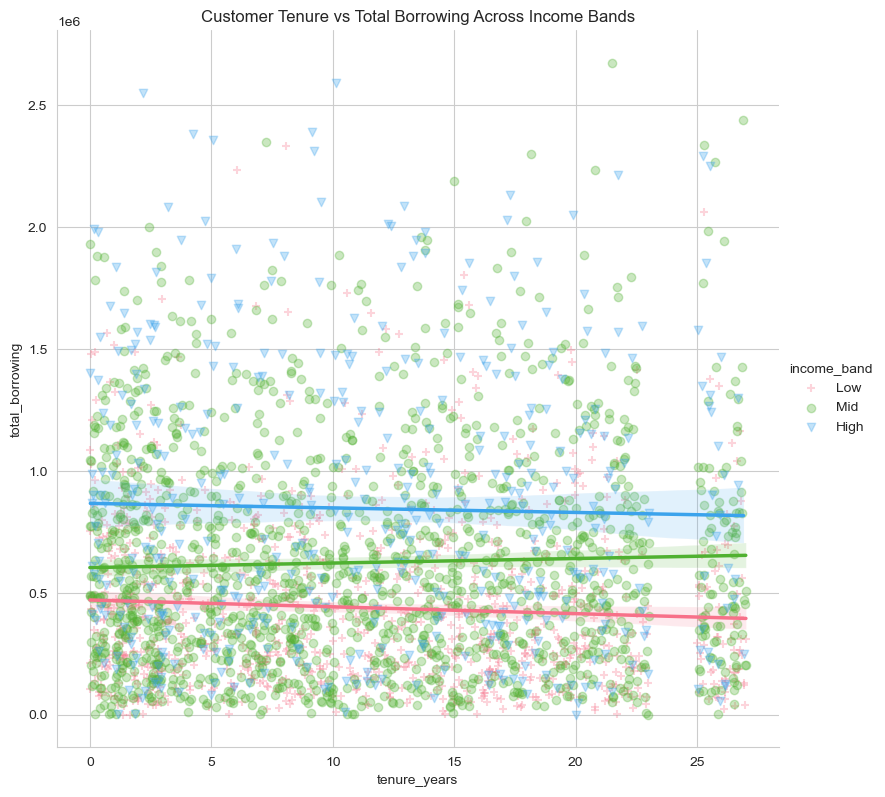

In [57]:
sns.set_style('whitegrid')
sns.lmplot(
    x = 'tenure_years',
    y = 'total_borrowing',
    data = customers_df,
    hue = 'income_band',
    palette = 'husl',
    markers = ['+', 'o', 'v'],
    aspect = 1,
    height = 8,
    scatter_kws = {'alpha': 0.3},
    line_kws = {'lw': 2.5}
)
plt.title('Customer Tenure vs Total Borrowing Across Income Bands')

- ***Key Insights:***

    - Borrowing stratifies by income, not tenure.
    - High-income customers borrow the most at nearly all tenures, with a slight decline and only a slight uptick for Mid and a slight decline for Low.
    - Risk takeaway:
        - Exposure concentration: High‑income customers hold the largest balances at nearly all tenures; prioritize tighter limits, stress tests, and periodic reviews for this band.
        - Tenure isn’t protective; avoid relaxing credit policies with relationship age and anchor decisions to income_band thresholds.
        - Watch for Mid‑band creep and Low‑band early‑tenure outliers; set band‑specific early‑warning triggers and manual reviews.

### 8) Do customers who take business lending also have larger bank loans, and does that relationship differ by customer tier (loyalty classification)?

Text(0.5, 1.0, 'Business lending vs Bank loans by loyalty tier')

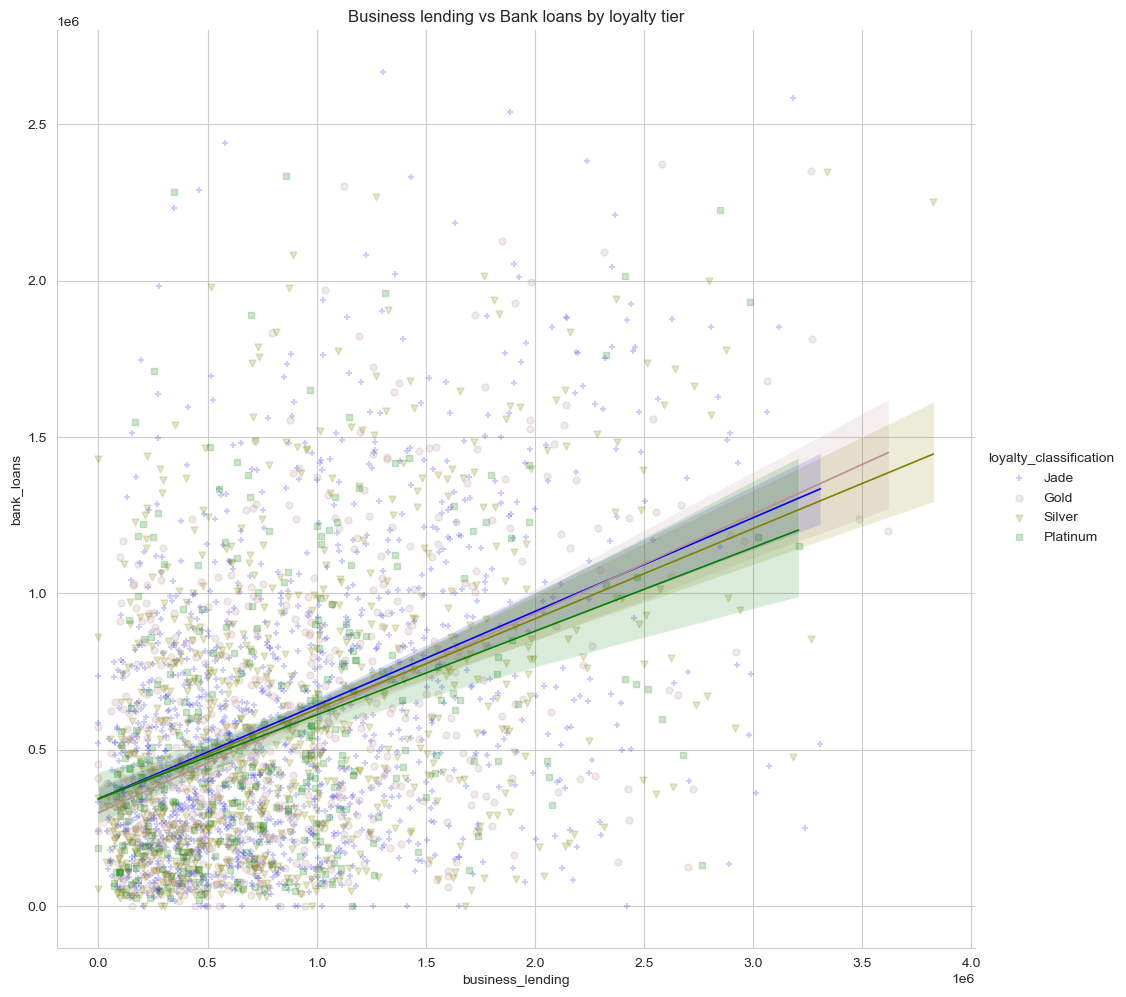

In [58]:
sns.set_style('whitegrid')
sns.lmplot(
    x = 'business_lending',
    y = 'bank_loans',
    data = customers_df,
    hue = 'loyalty_classification',
    palette = ['blue', 'rosybrown', 'olive', 'green'],
    markers = ['+', 'o', 'v', 's'],
    aspect = 1,
    height = 10,
    scatter_kws = {'alpha':0.2, 's':25},
    line_kws = {'lw': 1.2, 'alpha':1}
)
plt.title('Business lending vs Bank loans by loyalty tier')

- ***Key Insights:***

    - Customers with larger business lending also tend to have larger bank loans — all loyalty tiers show a clear positive relationship.
    - Gold sits slightly above the other tiers and shows the steepest rise — for the same business-lending amount Gold customers tend to carry the largest bank-loan exposure.
    - Platinum, despite being a higher loyalty tier, sits lower than other tiers — they take smaller bank loans for the same business-lending amount.
    - Jade, though a lower tier, tracks just below Gold and above Silver — meaning Jade customers carry materially more bank loans than Silver and Platinum at similar business-lending levels.
    - Silver falls between Jade and Platinum, exhibiting moderate bank-loan exposure relative to business lending.
    - Risk takeaway:
        - Gold (and to some extent Jade) show the highest combined exposure — apply stricter limits and closer monitoring on their large business loans, while keeping regular checks on Silver and Platinum.

---

# <u>Exporting customers_df to a .csv file for EDA Part 2.

In [59]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   client_id                 3000 non-null   object        
 1   name                      3000 non-null   object        
 2   age                       3000 non-null   int64         
 3   location_id               3000 non-null   int64         
 4   joined_bank               3000 non-null   datetime64[ns]
 5   banking_contact           3000 non-null   object        
 6   nationality               3000 non-null   object        
 7   occupation                3000 non-null   object        
 8   fee_structure             3000 non-null   object        
 9   loyalty_classification    3000 non-null   object        
 10  estimated_income          3000 non-null   float64       
 11  superannuation_savings    3000 non-null   float64       
 12  amount_of_credit_car

In [60]:
customers_df.to_csv('customers_df', index = False)

---

---